# Моделирование волновых движений

### Задание:
#### Замените в описанном выше документе функцию
$$exp(−x^2/2)$$

#### функцией

$$cos(2π/λ\cdot x) $$

- Проанализируйте поведение решений волнового уравнения для различных значений $λ$.
- Рассмотрите решение волнового уравнения при $t = 0$ - функцию $u(x, 0)$. Чему равен период функции $u(x, 0)$, называемый длиной волны?
- Рассмотрите решение волнового уравнения при $x = 0$ - функцию $u(0, t)$. Чему равен период функции $u(0, t)$, называемый периодом волны?
- Убедитесь в том, что отношение периода функции $u(x, 0)$ к периоду функции $u(0, t)$ равно скорости распространения волны $v$.

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m
import scipy.linalg as la
import scipy.sparse.linalg as sla

def Wave(A, x, lam):
    return A*np.cos((2 * np.pi / lam) * x)

def WaveP(A, x, v, t, lam):
    return Wave(A, x-v*t, lam)

def WaveN(A, x, v, t, lam):
    return Wave(A, x+v*t, lam)


def wave_dependence(Lambda):
    x_min = -2*np.pi
    x_max = 2*np.pi
    Nx = 101

    x = []

    for i in range(Nx):
        x.append(x_min + (x_max - x_min)/(Nx-1)*(i))
    
    t_min = 0
    t_max = 50
    v = 0.05
    Nt = 101

    t = []

    for j in range(Nt):
        t.append(t_min + ((t_max - t_min)/(Nt - 1))*(j))
    
    M1 = np.zeros((Nt, Nx), dtype=np.float64)
    M2 = np.zeros((Nt, Nx), dtype=np.float64)

    for i in range(Nt):
        for j in range(Nx):
            M1[i, j] = WaveP(1, x[j], v, t[i], Lambda)
            M2[i, j] = WaveN(1, x[j], v, t[i], Lambda)
        
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    p1 = ax1.plot(x, M1[0,:],'r--', x, M1[39,:],'g', x, M1[79,:],'b')

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    p2 = ax2.plot(x, M2[0,:],'r--', x, M2[39,:],'g', x, M2[79,:],'b')

    X, Y = np.meshgrid(x, t)

    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111, projection='3d')
    p3 = ax3.plot_surface(X, Y, M1)

    fig4 = plt.figure()
    ax4 = fig4.add_subplot(111, projection='3d')
    p4 = ax4.plot_surface(X, Y, M2)

    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    p5 = ax5.contourf(M1, 15)

    fig6 = plt.figure()
    ax6 = fig6.add_subplot(111)
    p6 = ax6.contourf(M2, 15)

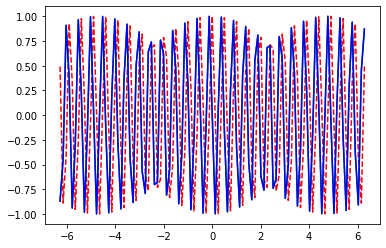

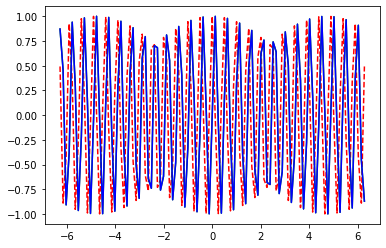

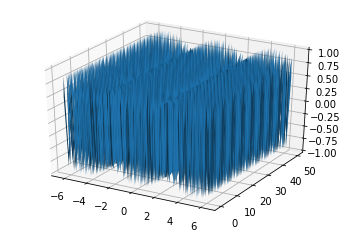

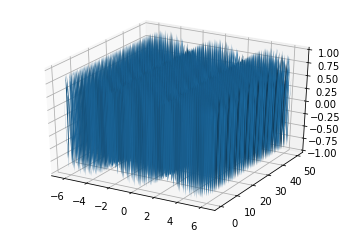

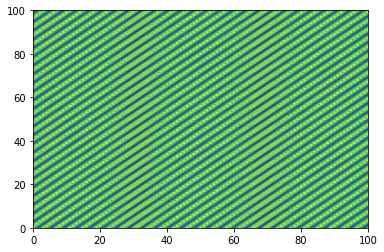

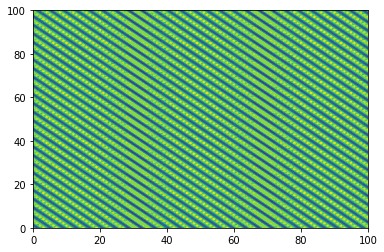

In [5]:
wave_dependence(0.1)

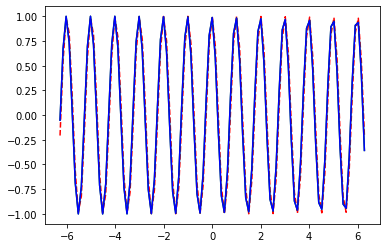

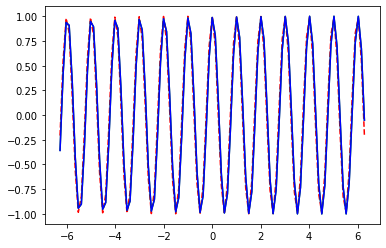

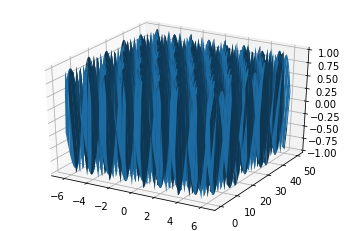

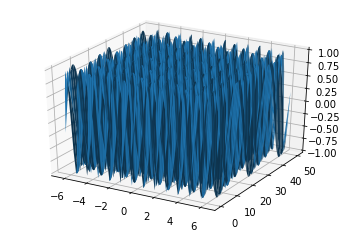

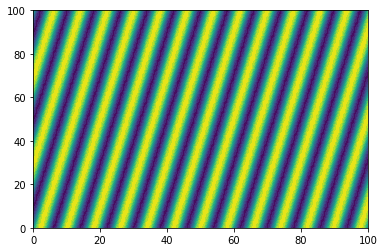

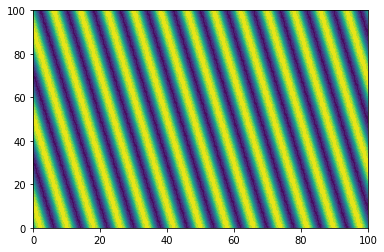

In [7]:
wave_dependence(1)

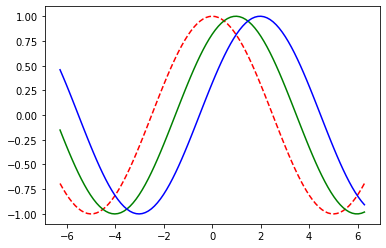

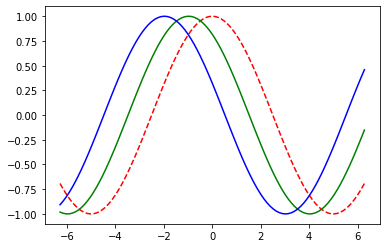

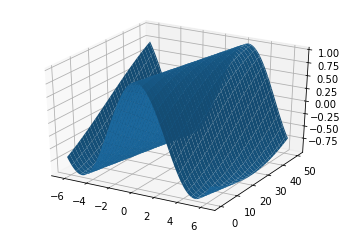

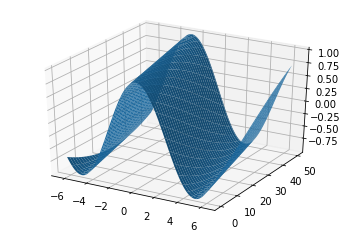

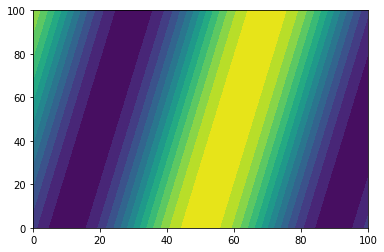

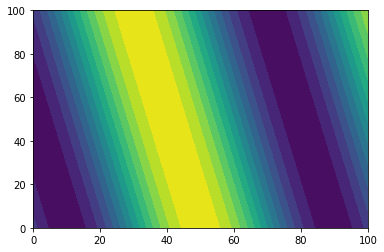

In [8]:
wave_dependence(10)

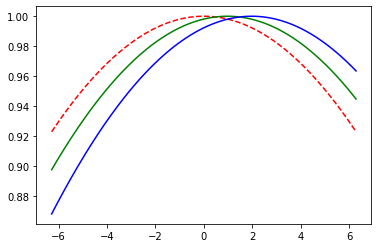

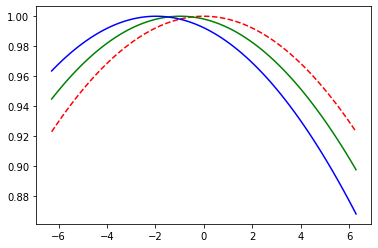

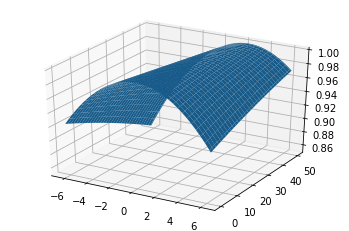

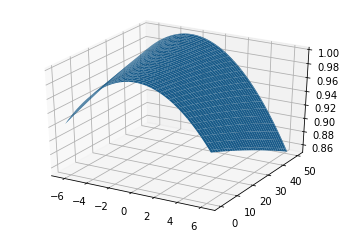

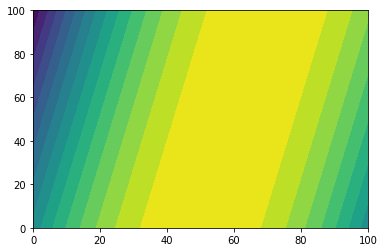

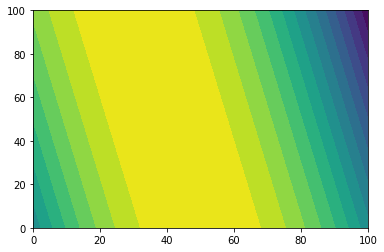

In [9]:
wave_dependence(100)

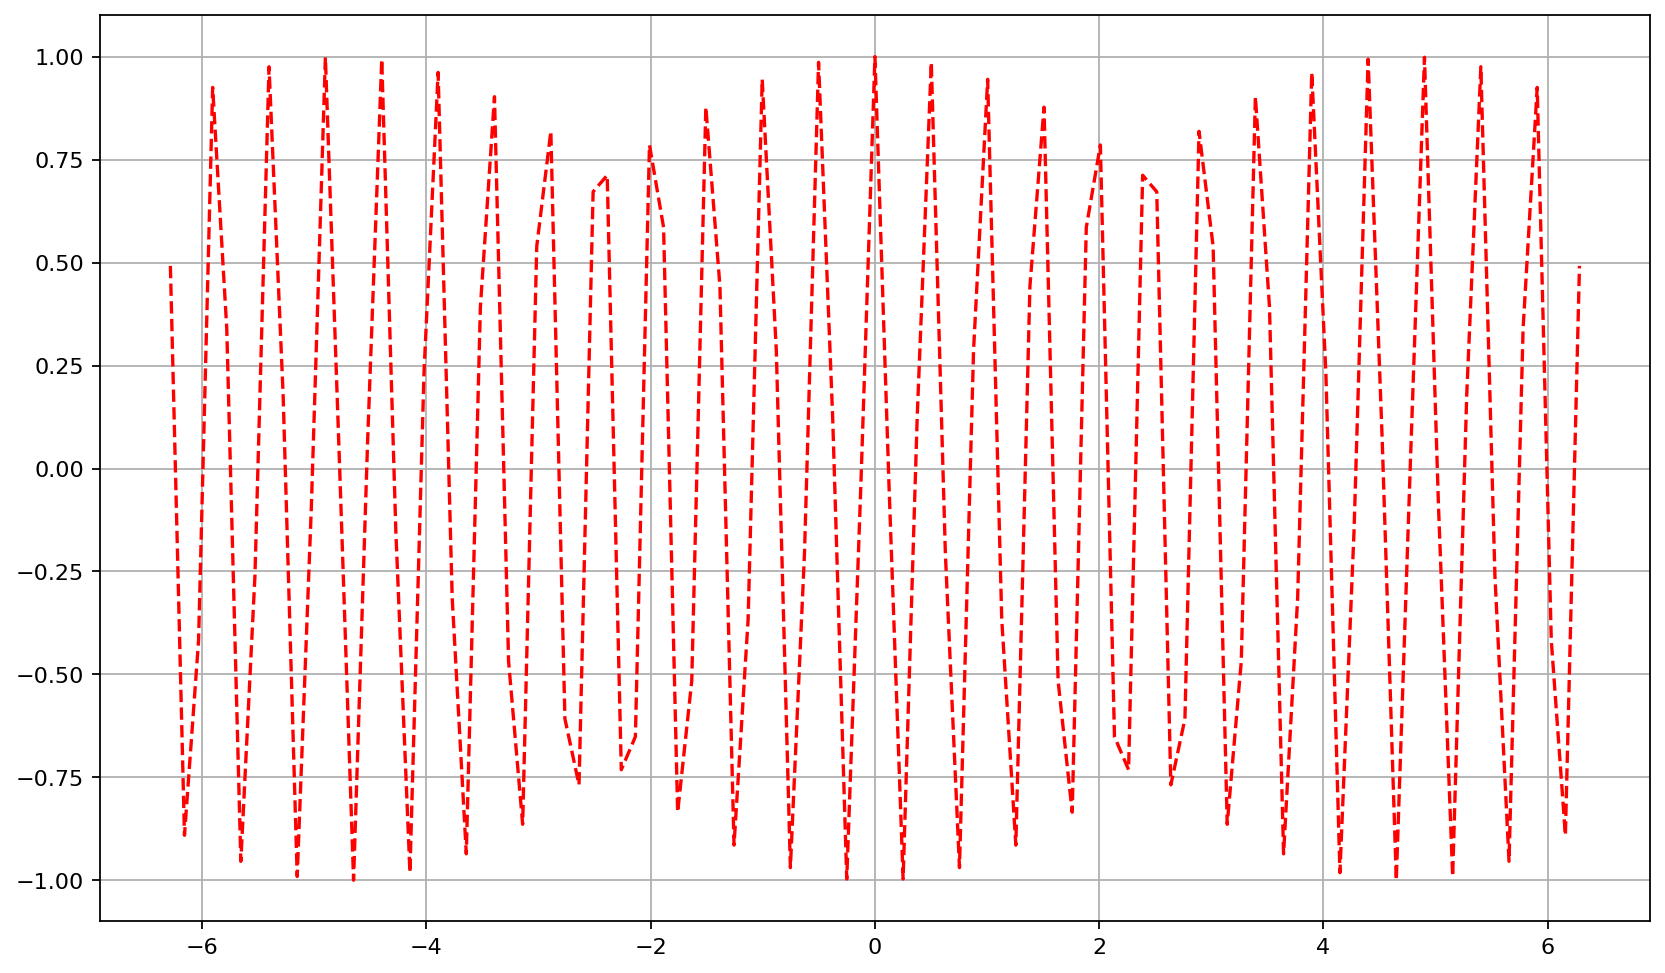

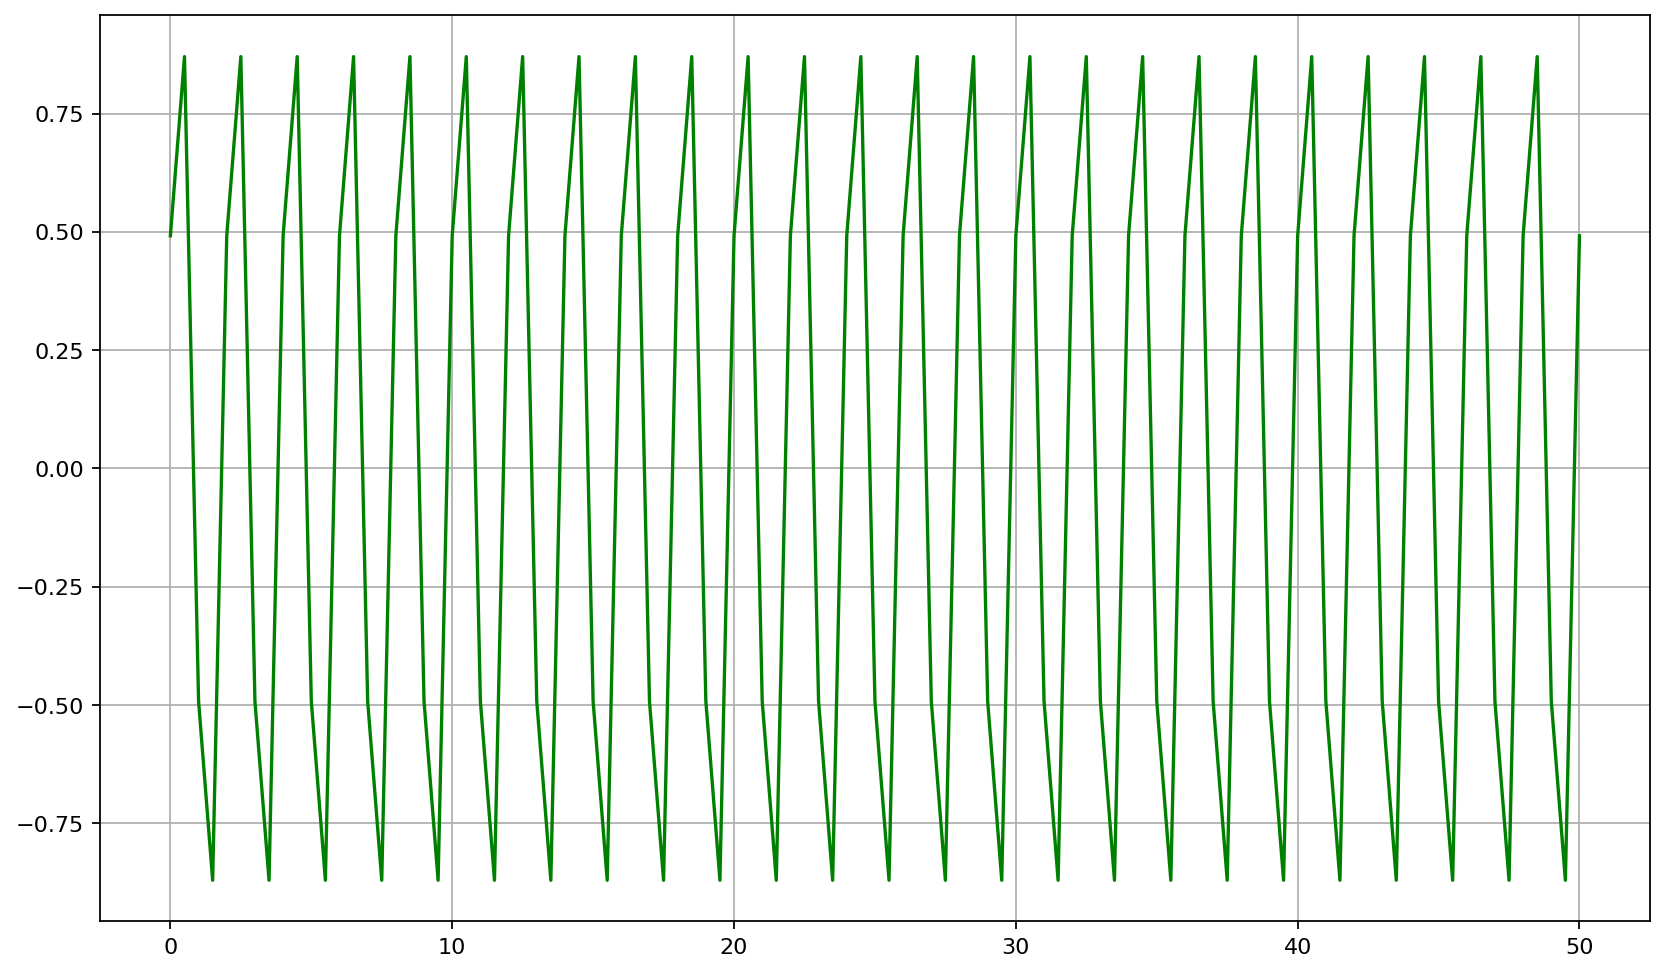

In [28]:
x_min = -2*np.pi
x_max = 2*np.pi
Nx = 101
Lambda = 0.1

x = []

for i in range(Nx):
    x.append(x_min + (x_max - x_min)/(Nx-1)*(i))
    
t_min = 0
t_max = 50
v = 0.05
Nt = 101

t = []

for j in range(Nt):
    t.append(t_min + ((t_max - t_min)/(Nt - 1))*(j))
    
M1 = np.zeros((Nt, Nx), dtype=np.float64)

for i in range(Nt):
    for j in range(Nx):
        M1[i, j] = WaveP(1, x[j], v, t[i], Lambda)
        

X, Y = np.meshgrid(x, t)

fig1 = plt.figure(figsize=(12.5, 7.5), dpi=160)
ax1 = fig1.add_subplot(111)
p1 = ax1.plot(x, M1[0,:],'r--')

plt.grid(True)

fig2 = plt.figure(figsize=(12.5, 7.5), dpi=160)
ax2 = fig2.add_subplot(111)
p2 = ax2.plot(t, M1[:,0], 'g')

plt.grid(True)


$ cos(\frac{2\pi (x - vt)}{\lambda}) = cos(\frac{2\pi x}{\lambda} - \frac{2\pi vt}{\lambda})$

Первый случай:

$ u(x, 0) = cos(\frac{2\pi x}{\lambda}) $

$ T_{1} = \lambda $

Второй случай:

$ u(0, t) = cos(\frac{2\pi vt}{\lambda}) $

$ T_{2} = \frac{\lambda}{v} $

Путем несложных вычислений получаем, что $\frac{T_{1}}{T_{2}} = v $

### Задание:
#### На практике ширина реальных щелей гораздо больше длины волны, поэтому более адекватной является модель, в которой щель рассматривается как набор когерентных источников сферических волн (принцип Гюйгенса).
- Рассчитайте распределение интенсивности света с длиной волны $λ = 5 · 10^{−4}$ мм от одной щели конечного размера, заменяя его $N = 20$ точечными источниками, отстоящими друг от друга на $0.001$ мм. Определите ширину центрального пика интенсивности при $L = 200$ мм. Как соотносится ширина центрального пика с шириной щели? Как зависят полученные результаты от числа источников N?
- Как зависит положение первого минимума дифракционной картины от длины волны, ширины щели и расстояния до экрана.
- Проведите сравнительный анализ распределений интенсивности для $L = 1$ мм и $L = 50$ мм.

In [29]:
def Intensity1(Lambda, N, A, R0, r, Nb):
    
    Rr= np.zeros(N, dtype=np.float64)
    f = np.zeros(Nb, dtype=np.float64)
    
    for i in range(N):
        Rr[i] = np.linalg.norm(r - R0[:,i])
        
    for i in range(Nb):
        su = 0
        
        for j in range(N):
            su += (A[j]/Rr[j]*np.cos(2*np.pi/Lambda*Rr[j]-2*np.pi/Nb*i))
        f[i] = su**2
        
    return np.mean(f)

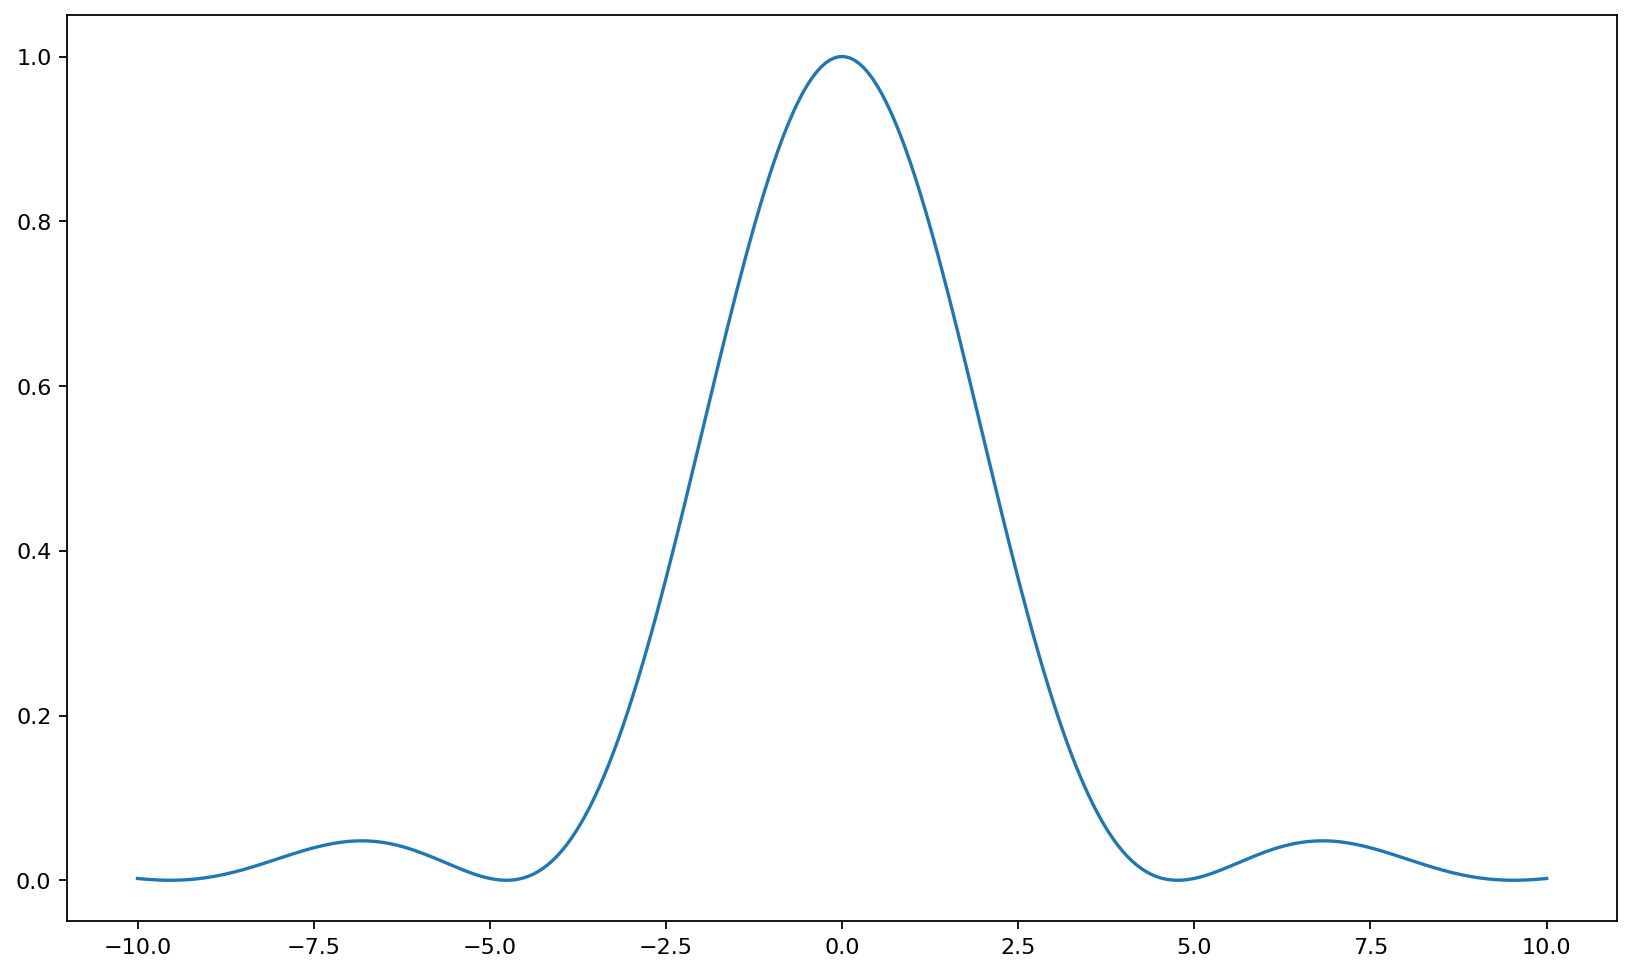

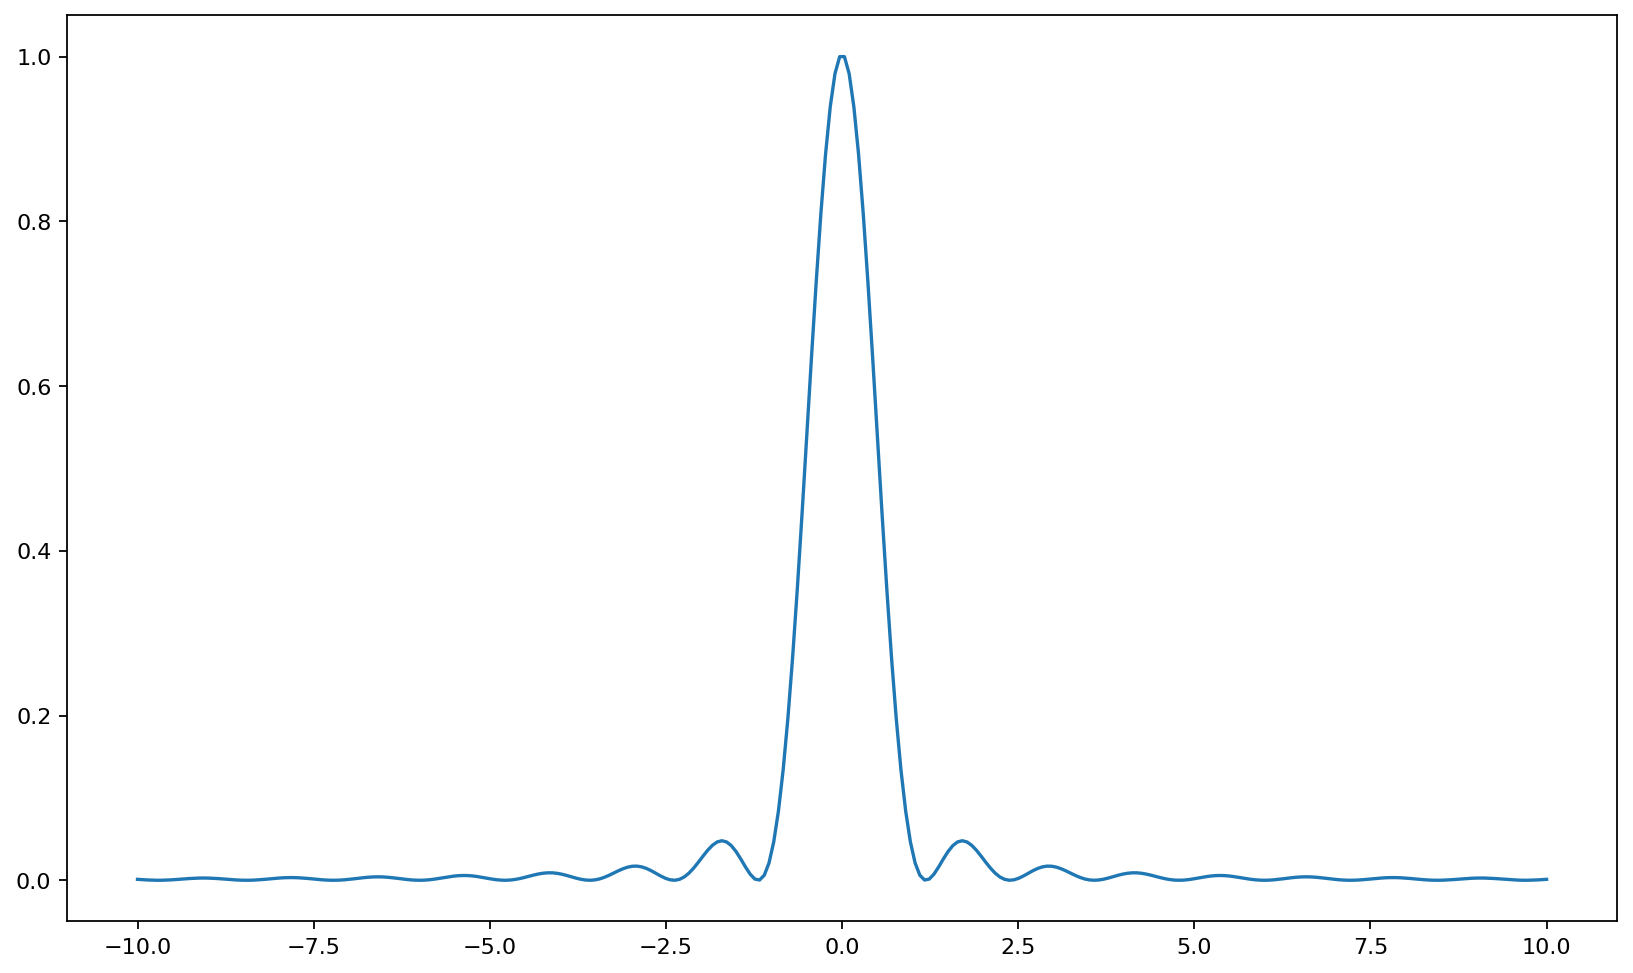

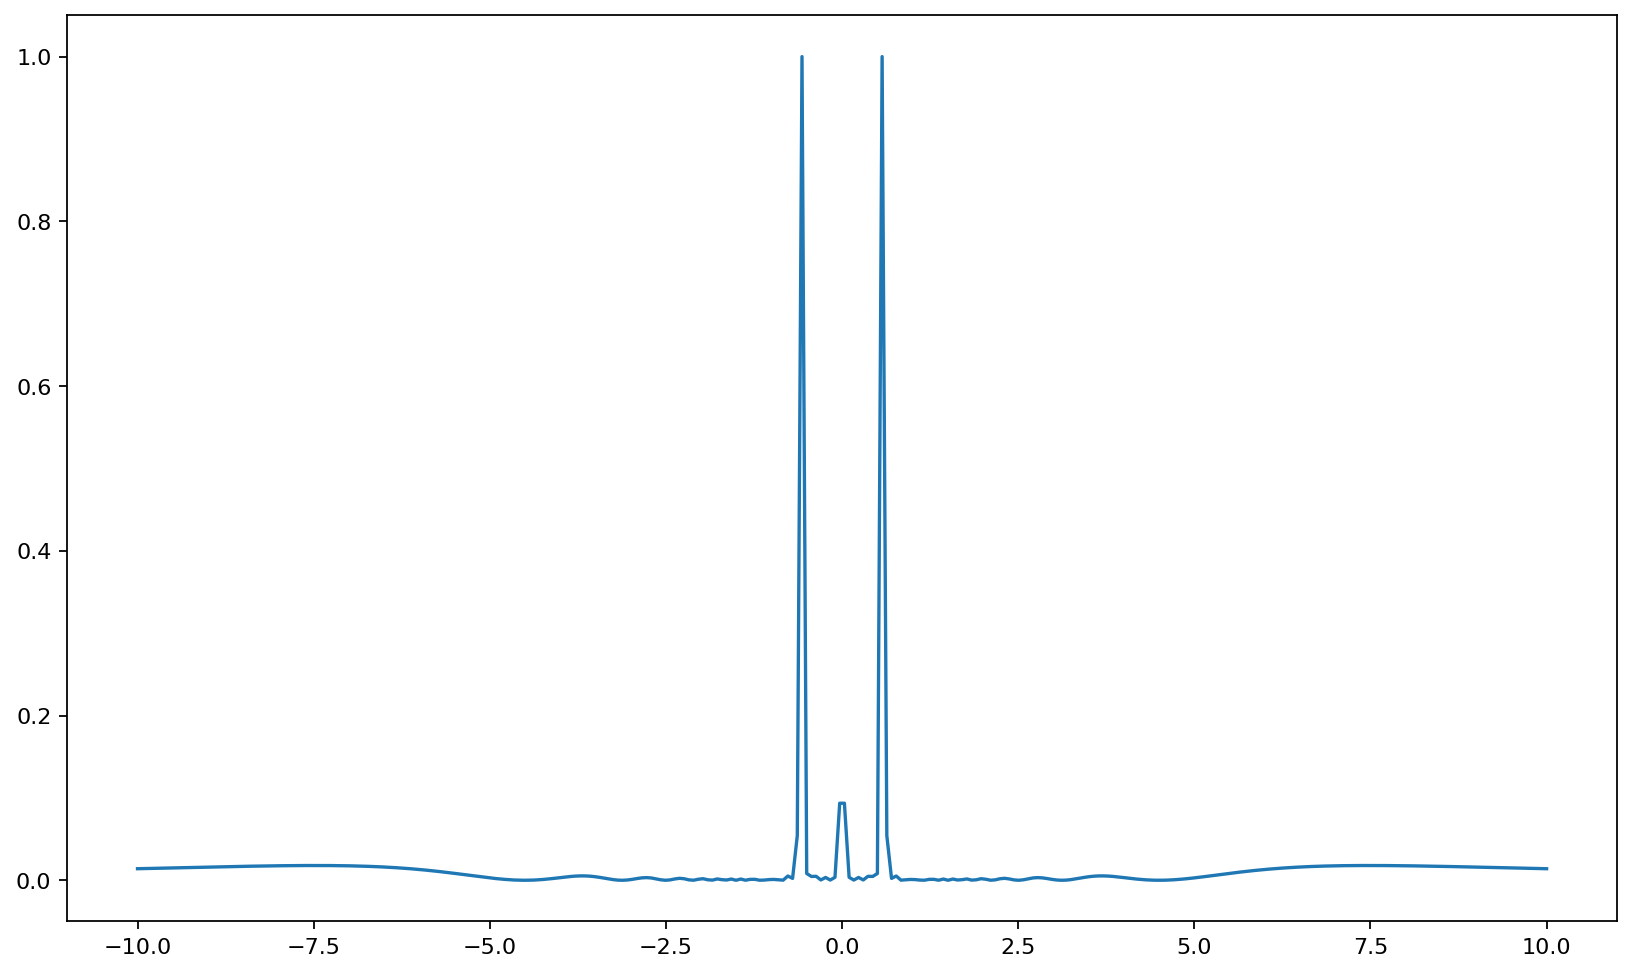

In [30]:
def longGap(width):
    N = 21
    A = [1 for i in range(N)]
    Lambda = 5e-4

    R = np.zeros((N, 3))
    for i in range(21):
        R[:, 2][i] = -0.01 + i * 0.001
    R = R.T

    Np = 300
    z_min = -10
    z_max = 10

    z = np.zeros(Np, dtype=np.float64)

    for i in range(Np):
        z[i] = z_min + (z_max - z_min)/(Np - 1)*(i)

    L = width
    Nb = 3
    I1 = np.zeros(Np, dtype=np.float64)

    for i in range(Np):
        r = np.array([0, L, z[i]]).T
        I1[i] = Intensity1(Lambda, N, A, R, r, Nb)

    I1max = np.amax(I1)
    fig1 = plt.figure(figsize=(12.5, 7.5), dpi=160)
    ax1 = fig1.add_subplot(111)
    p1 = ax1.plot(z, I1/I1max)

longGap(200)
longGap(50)
longGap(1)

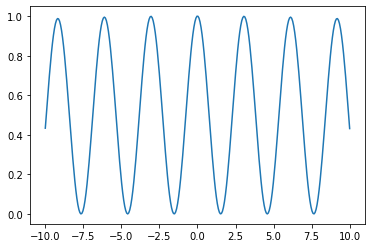

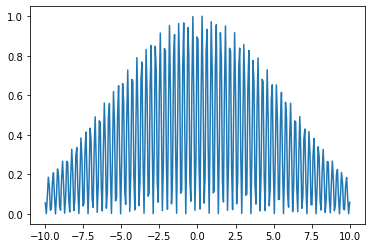

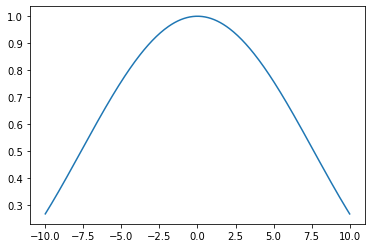

In [31]:
def doubleLongGap(Lambda):
    N = 40
    A = [1 for i in range(N)]

    R = np.zeros((N, 3))
    for i in range(round(N/2)):
        R[:, 2][i] = -0.05 - N/4 * 0.0001 + i * 0.0001
    
    for i in range(round(N/2), N):
        R[:, 2][i] = 0.05 + N/4 *0.0001 - i * 0.0001
    R = R.T

    Np = 300
    z_min = -10
    z_max = 10

    z = np.zeros(Np, dtype=np.float64)

    for i in range(Np):
        z[i] = z_min + (z_max - z_min)/(Np - 1)*(i)
    
    L = 600
    Nb = 3
    I1 = np.zeros(Np, dtype=np.float64)

    for i in range(Np):
        r = np.array([0, L, z[i]]).T
        I1[i] = Intensity1(Lambda, N, A, R, r, Nb)
    
    I1max = np.amax(I1)
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    p1 = ax1.plot(z, I1/I1max)
    
doubleLongGap(5e-4)
doubleLongGap(0.5e-4)
doubleLongGap(50e-4)

### Задание:
#### Используя описанный выше документ, проведите сравнительный анализ траекторий луча для различных законов изменения коэффициента преломления $f (y) = (1 + ay^α)^β$. Почему в ряде случаев вычисление численного значения интеграла ***(31)*** оказывается невозможным, но при использовании в качестве нижней границы интегрирования некоторой величины $ϵ ≪ 1$ интеграл оказывается сходящимся?


In [32]:
def CoeffRefraction(y, alpha, beta, a):
    return (1+a*(y**alpha))**beta

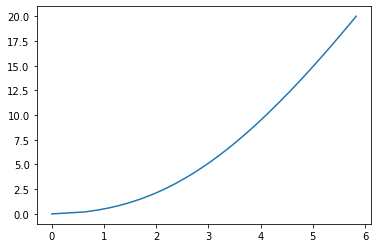

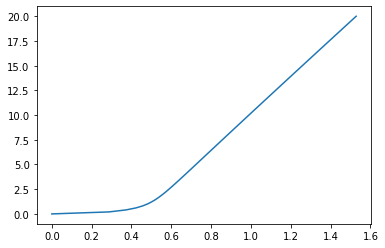

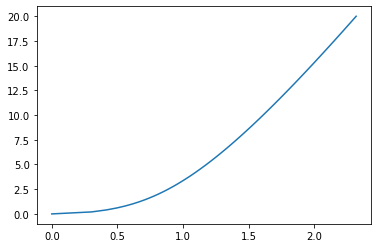

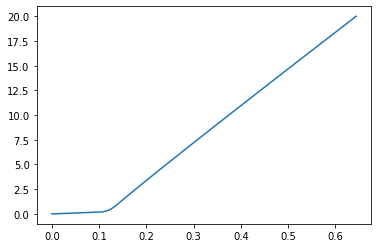

In [36]:
def trajectory(alpha, beta, a):
    y_min = 1e-5
    y_max = 20
    Np = 100

    y = []

    for i in range(Np):
        y.append(y_min + (y_max - y_min)/(Np-1)*(i))
    
    Nk = 1000

    Y = np.zeros(Nk, dtype=np.float64)
    Z = np.zeros(Nk, dtype=np.float64)

    Xb = np.zeros(Np, dtype=np.float64)
    Yb = np.zeros(Np, dtype=np.float64)

    for i in range(Np):
        for k in range(Nk):
            Y[k] = y_min + (y[i] - y_min)/(Nk -1)*(k)
            Z[k] = 1/((CoeffRefraction(Y[k], alpha, beta, a)**2-1)**0.5)
        
        Xb[i] = np.trapz(Z, Y)
        Yb[i] = Y[Nk-1]
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    p1 = ax1.plot(Xb, Yb)
    
trajectory(1, 1, 1)
trajectory(1, 4, 1)
trajectory(1, 1, 4)
trajectory(1, 4, 4)